# HW3: One-night accommodation
Group 39 - BEN BELHASSEN Mohamed Ali, CIAMPANA Lorenzo, FILESI Gianluca, NUBE Giacomo

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math
import warnings

In [2]:
df = pd.read_excel('hotels_one_night.xlsx')
df.head()

,price,stars,distance,rating,accommodation_type,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,81,4.0,2.8,4.4,Apartment,NaN,NaN,1.0
1,81,4.0,1.8,3.9,Hotel,NaN,NaN,2.0
2,85,4.0,1.5,3.7,Hotel,NaN,NaN,2.5
3,83,3.0,1.8,4.0,Hotel,NaN,NaN,3.0
4,82,4.0,1.3,3.9,Hotel,NaN,NaN,3.5


## Exploratory Data Analysis

### 1.a We expect that the distance to the city center affects the price. Create the following scatter plots:

#### 1. A scatter plot showing the distance compared to the price.

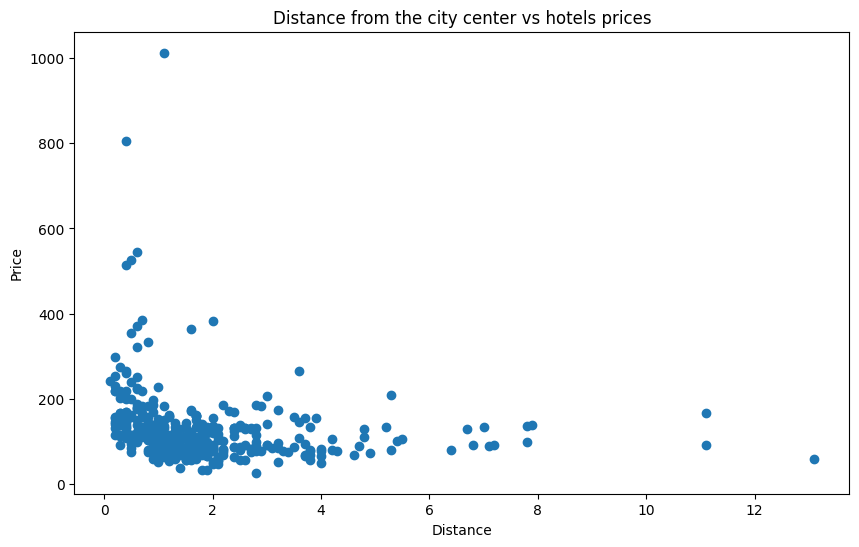

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df['distance'],df['price'])
plt.xlabel('Distance')
plt.ylabel('Price')
plt.title('Distance from the city center vs hotels prices')
plt.show()

#### 2. A scatter plot of the natural logarithm of the distance (i.e., ln(distance)) compared to the natural logarithm of the price (i.e., ln(price)).

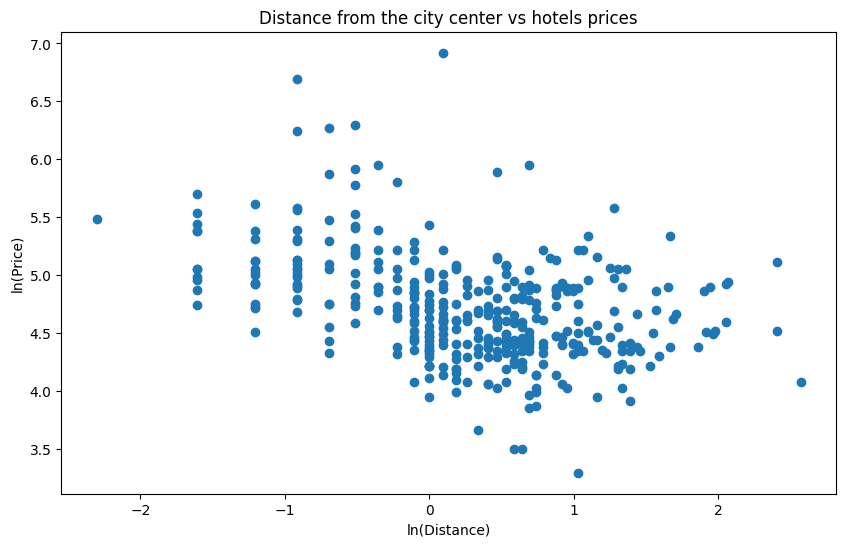

In [4]:
ln_distance = np.log(df['distance'])
ln_price = np.log(df['price'])
df['ln_distance'] = ln_distance
df['ln_price'] = ln_price
plt.figure(figsize=(10, 6))
plt.scatter(ln_distance,ln_price)
plt.xlabel('ln(Distance)')
plt.ylabel('ln(Price)')
plt.title('Distance from the city center vs hotels prices')
plt.show()


#### 3. Which transformation results in the strongest linear relationship between the two variables?

In [5]:
X = sm.add_constant(df['distance'])
ex1_model1 = sm.OLS(df['price'],X).fit()
ex1_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     15.67
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           8.98e-05
Time:                        16:23:33   Log-Likelihood:                -2287.9
No. Observations:                 390   AIC:                             4580.
Df Residuals:                     388   BIC:                             4588.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        145.5599      6.487     22.440      0.000     132.806     158.313
distance     -10.5472      2.665     -3.958      0.000     -15.786      -5.308
==============================================================================
Omnibus:                      441.361   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            27033.603
Skew:                           5.086   Prob(JB):                         0.00
Kurtosis:                      42.499   Cond. No.                         4.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
X = sm.add_constant(df['ln_distance'])
ex1_model2 = sm.OLS(df['ln_price'],X).fit()
ex1_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     76.58
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           6.56e-17
Time:                        16:23:33   Log-Likelihood:                -216.18
No. Observations:                 390   AIC:                             436.4
Df Residuals:                     388   BIC:                             444.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           4.7772      0.023    211.584      0.000       4.733       4.822
ln_distance    -0.2289      0.026     -8.751      0.000      -0.280      -0.177
==============================================================================
Omnibus:                       68.910   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.879
Skew:                           0.870   Prob(JB):                     7.84e-38
Kurtosis:                       5.737   Cond. No.                         1.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The closer the $R^2$ is to 1, the more precise the model. Considering $R^2$ as the determinant for identifying the model with greater accuracy, we will select the second model ($R^2=0.165$), as it has an higher $R^2$ compared to the first model ($R^2=0.039$). 

### 1.b Let us investigate the relationship between price and rating. Create the following scatter plots:

#### 1. A scatter plot showing the rating compared to the natural logarithm of the price (i.e., ln(price)).

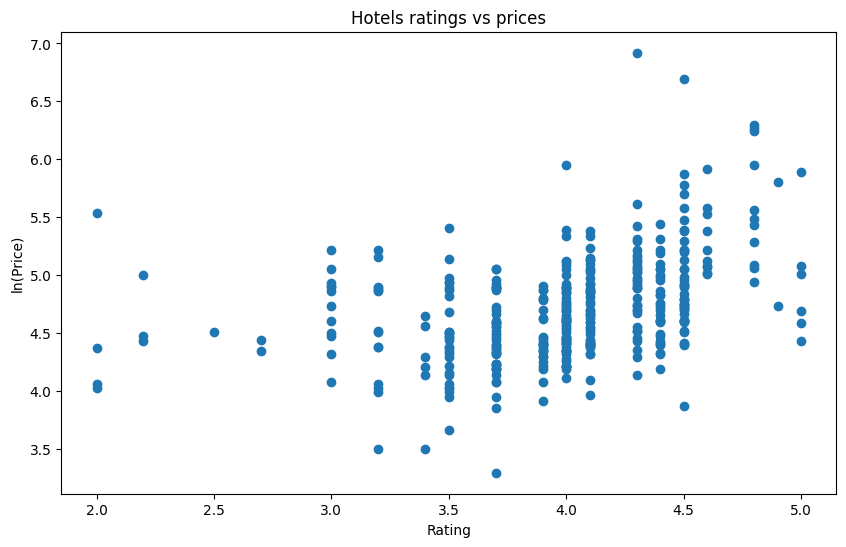

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], ln_price)
plt.xlabel('Rating')
plt.ylabel('ln(Price)')
plt.title('Hotels ratings vs prices')
plt.show()

#### 2. A scatter plot of the exponential of the rating (i.e., exp(rating)) compared to the natural logarithm of the price (i.e., ln(price)).

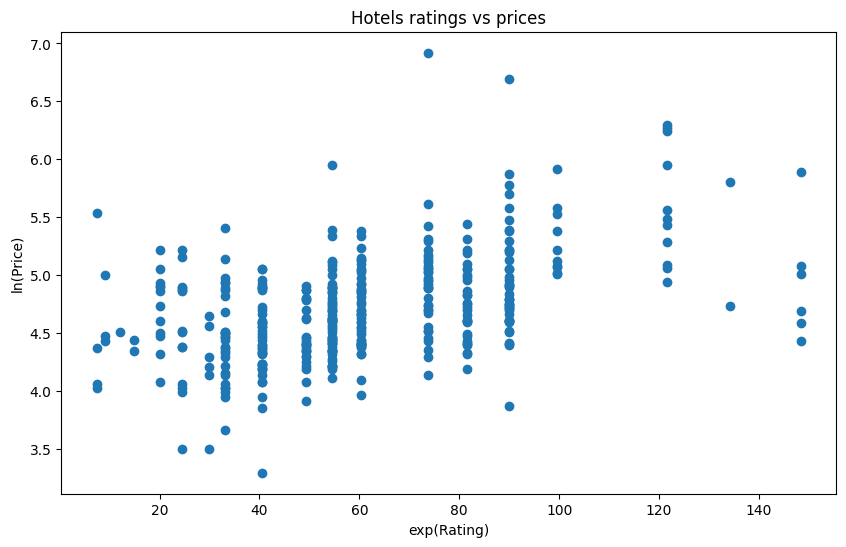

In [8]:
exp_rating = np.exp(df['rating'])
df['exp_rating'] = exp_rating
plt.figure(figsize=(10, 6))
plt.scatter(exp_rating, ln_price)
plt.xlabel('exp(Rating)')
plt.ylabel('ln(Price)')
plt.title('Hotels ratings vs prices')
plt.show()


#### 3. Which transformation gives the strongest linear relationship between the two variables?

In [9]:
X = sm.add_constant(df['rating'])
ex1_model3 = sm.OLS(df['ln_price'],X).fit()
ex1_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     71.35
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           6.07e-16
Time:                        16:23:35   Log-Likelihood:                -218.39
No. Observations:                 390   AIC:                             440.8
Df Residuals:                     388   BIC:                             448.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3091      0.168     19.734      0.000       2.979       3.639
rating         0.3517      0.042      8.447      0.000       0.270       0.434
==============================================================================
Omnibus:                       66.761   Durbin-Watson:                   1.781
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.556
Skew:                           0.885   Prob(JB):                     9.09e-33
Kurtosis:                       5.438   Cond. No.                         33.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
X = sm.add_constant(df['exp_rating'])
ex1_model4 = sm.OLS(df['ln_price'],X).fit()
ex1_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           1.66e-22
Time:                        16:23:35   Log-Likelihood:                -203.37
No. Observations:                 390   AIC:                             410.7
Df Residuals:                     388   BIC:                             418.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2303      0.051     83.121      0.000       4.130       4.330
exp_rating     0.0079      0.001     10.399      0.000       0.006       0.009
==============================================================================
Omnibus:                       57.518   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.175
Skew:                           0.754   Prob(JB):                     1.21e-29
Kurtosis:                       5.433   Cond. No.                         164.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The closer the $R^2$ is to 1, the more precise the model. Considering $R^2$ as the determinant for identifying the model with greater accuracy, we will select the second model ($R^2=0.218$), as it has an higher $R^2$ compared to the first model ($R^2=0.155$). 

## Multiple linear regression

Model 1: $\ln(\text{price})$ = $\beta_0$ + $\beta_1\text{Hotel}_i$ + $\beta_2\text{stars3}_i$ + $\beta_3\text{stars4}_i$ + $\beta_4\text{stars5}_i$ + $\beta_5\text{stars3\_Hotel}_i$ + $\beta_6\text{stars4\_Hotel}_i$ + $\beta_7\exp(\text{rating}_i)$ + $\beta_8\ln(\text{distance}_i)$+ $\epsilon_i$;

- Hotel is a dummy variable equal to 1 if the accommodation is a hotel,
- stars3 is a dummy variable equal to 1 if the accommodation has a star of 3 or 3.5,
- stars4 is a dummy variable equal to 1 if the accommodation has a star of 4 or 4.5,
- stars5 is a dummy variable equal to 1 if the accommodation has a star of 5,
- stars3 Hotel is an interaction variable between stars3 and Hotel,
- stars4 Hotel is an interaction variable between stars4 and Hotel.

In [11]:
df.head()

,price,stars,distance,rating,accommodation_type,Unnamed: 5,Unnamed: 6,Unnamed: 7,ln_distance,ln_price,exp_rating
0,81,4.0,2.8,4.4,Apartment,NaN,NaN,1.0,1.029619,4.394449,81.450869
1,81,4.0,1.8,3.9,Hotel,NaN,NaN,2.0,0.587787,4.394449,49.402449
2,85,4.0,1.5,3.7,Hotel,NaN,NaN,2.5,0.405465,4.442651,40.447304
3,83,3.0,1.8,4.0,Hotel,NaN,NaN,3.0,0.587787,4.418841,54.598150
4,82,4.0,1.3,3.9,Hotel,NaN,NaN,3.5,0.262364,4.406719,49.402449


In [12]:
df['Hotel'] = df['accommodation_type'].apply(lambda x: 1 if x == 'Hotel' else 0)
df['stars3'] = df['stars'].apply(lambda x: 1 if math.floor(x) == 3 else 0)
df['stars4'] = df['stars'].apply(lambda x: 1 if math.floor(x) == 4 else 0)
df['stars5'] = df['stars'].apply(lambda x: 1 if math.floor(x) == 5 else 0)
df['stars3_Hotel'] = df['stars3'] * df['Hotel']
df['stars4_Hotel'] = df['stars4'] * df['Hotel']
df.head()


,price,stars,distance,rating,accommodation_type,Unnamed: 5,Unnamed: 6,Unnamed: 7,ln_distance,ln_price,exp_rating,Hotel,stars3,stars4,stars5,stars3_Hotel,stars4_Hotel
0,81,4.0,2.8,4.4,Apartment,NaN,NaN,1.0,1.029619,4.394449,81.450869,0,0,1,0,0,0
1,81,4.0,1.8,3.9,Hotel,NaN,NaN,2.0,0.587787,4.394449,49.402449,1,0,1,0,0,1
2,85,4.0,1.5,3.7,Hotel,NaN,NaN,2.5,0.405465,4.442651,40.447304,1,0,1,0,0,1
3,83,3.0,1.8,4.0,Hotel,NaN,NaN,3.0,0.587787,4.418841,54.598150,1,1,0,0,1,0
4,82,4.0,1.3,3.9,Hotel,NaN,NaN,3.5,0.262364,4.406719,49.402449,1,0,1,0,0,1


### 2.a) Estimate Model 1. What is the estimated value of $\beta_1$, which is associated with the hotel variable?

In [13]:
X = df[['Hotel', 'stars3','stars4','stars5','stars3_Hotel','stars4_Hotel','exp_rating','ln_distance']]
X = sm.add_constant(X)
ex2_model1 = sm.OLS(df['ln_price'],X).fit()
ex2_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     41.30
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           2.65e-47
Time:                        16:23:35   Log-Likelihood:                -129.54
No. Observations:                 390   AIC:                             277.1
Df Residuals:                     381   BIC:                             312.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.5562      0.066     69.411      0.000       4.427       4.685
Hotel           -0.4189      0.091     -4.613      0.000      -0.597      -0.240
stars3          -0.0699      0.072     -0.977      0.329      -0.211       0.071
stars4          -0.1517      0.095     -1.605      0.109      -0.338       0.034
stars5           0.9203      0.104      8.875      0.000       0.716       1.124
stars3_Hotel     0.2671      0.106      2.517      0.012       0.058       0.476
stars4_Hotel     0.5174      0.119      4.339      0.000       0.283       0.752
exp_rating       0.0044      0.001      5.969      0.000       0.003       0.006
ln_distance     -0.1319      0.023     -5.727      0.000      -0.177      -0.087
==============================================================================
Omnibus:                      102.542   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              674.522
Skew:                           0.930   Prob(JB):                    3.38e-147
Kurtosis:                       9.169   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
beta1 = ex2_model1.params.iloc[1]
print(beta1)

-0.41886751873200323


$\beta_1=-0.4189$

### 2.b How does the variable stars4_Hotel impact the log price ? Provide a numerical interpretation.

In [15]:
beta6 = ex2_model1.params.iloc[6]
print(beta6)

0.5174436964326377


The impact of stars4_Hotel on the $\ln(\text{price})$ is equal to $\beta_6$. It means that if stars4_Hotel increases by 1, $\ln(\text{price})$ increases by 0.52.

### 2.c How does the variable distance (not the log distance) impact the price (not the log price) ? Provide a numerical interpretation.


In [16]:
beta8 = ex2_model1.params.iloc[8]
print(beta8)

-0.13190770678785518


Thanks to Taylor's approximation, when $\ln(x+1\%)$, $\ln(y)$ increases by $0.01\beta_8$. Again, thanks to Taylor's approximation, when $\ln(y)$ increases by $0.01\beta_8$, we know that $y$ increases by $0.01\beta_8$. To sum up, when $\text{distance}+1\%$, $\text{price}-13\%$.

### 2.d Predict the one-night price (not the log price) for a 4-star hotel with a rating of 3.5 at a distance of 1.

In [17]:
H = 1
S3 = 0
S4 = 1
S5 = 0
Rat = 3.5
dist = 1
Data = [1, H, S3, S4, S5, S3*H, S4*H, np.exp(Rat), np.log(dist)]
ex2_model1.predict(Data)
price = np.exp(ex2_model1.predict(Data))
print(price)


[104.54192844]


The one-night price for the selected hotel is 104.54 USD.

### 2.e Which variables are not significant at a 95% confidence level?

We should reject the Null hypothesis (a variable is not significant) when the $p$-value is lower than $5\%$. From the OLS summary, stars3 and stars4 should be rejected. It could mean that, besides a 5 stars hotel, for all the rest of hotels, other factors are more important.

## Multiple linear regression: second model

Model 2: $\ln(\text{price})$ = $\beta_0$ + $\beta_1\text{Hotel}_i$ + $\beta_2\text{stars3}_i$ + $\beta_3\text{stars4}_i$ + $\beta_4\text{stars5}_i$ + $\beta_5\text{stars3\_Hotel}_i$ + $\beta_6\text{stars4\_Hotel}_i$ + $\beta_7\exp(\text{rating}_i)$ + $\beta_8\ln(\text{distance}_i)$+ $\beta_9\text{distance}_i$+$\epsilon_i$;

### 3.a Discuss two statistical reasons for choosing Model 2 over Model 1.

In [18]:
X = df[['Hotel', 'stars3','stars4','stars5','stars3_Hotel','stars4_Hotel','exp_rating','ln_distance','distance']]
X = sm.add_constant(X)
ex2_model2 = sm.OLS(df['ln_price'],X).fit()
ex2_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.498
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     41.92
Date:                Wed, 30 Oct 2024   Prob (F-statistic):           9.44e-52
Time:                        16:23:36   Log-Likelihood:                -116.84
No. Observations:                 390   AIC:                             253.7
Df Residuals:                     380   BIC:                             293.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.4465      0.067     66.154      0.000       4.314       4.579
Hotel           -0.4242      0.088     -4.820      0.000      -0.597      -0.251
stars3          -0.1017      0.070     -1.460      0.145      -0.239       0.035
stars4          -0.2095      0.092     -2.268      0.024      -0.391      -0.028
stars5           0.8437      0.102      8.300      0.000       0.644       1.044
stars3_Hotel     0.2613      0.103      2.540      0.011       0.059       0.464
stars4_Hotel     0.5222      0.116      4.518      0.000       0.295       0.749
exp_rating       0.0048      0.001      6.610      0.000       0.003       0.006
ln_distance     -0.3025      0.040     -7.479      0.000      -0.382      -0.223
distance         0.0994      0.020      5.058      0.000       0.061       0.138
==============================================================================
Omnibus:                      118.800   Durbin-Watson:                   2.118
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1020.358
Skew:                           1.025   Prob(JB):                    2.70e-222
Kurtosis:                      10.654   Cond. No.                         719.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since we are using one more variable, the computational cost may afflict the benefits of the new model. For this reason, instead of comparing $R^2$ we should compare $R^2_{adj}$.

In [19]:
ex2_model1.rsquared_adj < ex2_model2.rsquared_adj

True

The new model is better than the last one.

Adding a variable that is strictly connected to another variable may cause multicollinearity issues.

In [20]:
VIF = 1/(1-ex2_model2.rsquared)
print(VIF)

1.9928912806915362


In model 2 we don't have this issue.

In [21]:
print(ex2_model1.aic)
print(ex2_model2.aic)

277.08989236066395
253.67827263236222


Eventually, also in term of AIC the second model is better. Since in model 2 AIC is lower than in model 1, it means that model 2 has a greater explanatory power. Basically, model 1 is too complex for the explanatory power that it has.

### 3.b Create a diagnostic plot to test the linearity assumption. What do you conclude about this assumption?

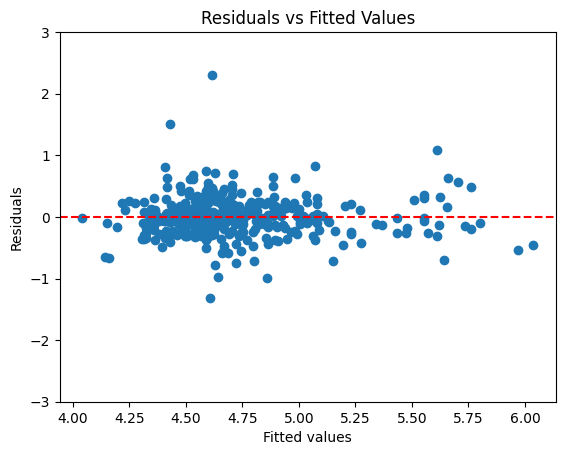

In [22]:
fitted_values = ex2_model2.fittedvalues 
residuals = ex2_model2.resid  

# Plot residuals vs fitted values
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.ylim(-3, 3)  
plt.show()



Even though there is a concentration around 4.5, no patterns are detectable. The linearity assumption might hold.

### 3.c Create a diagnostic plot to test the homoskedasticity assumption. What do you conclude about this assumption?


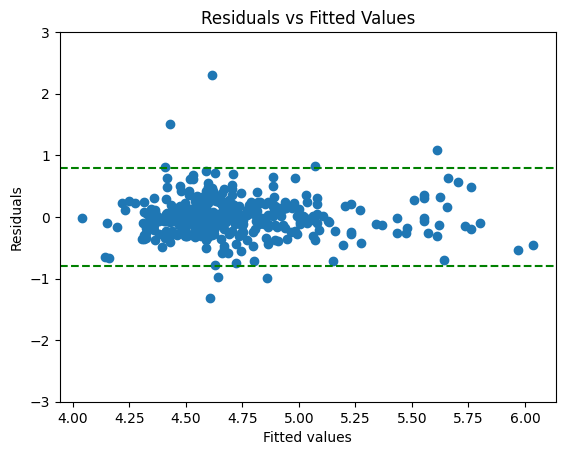

In [23]:
# Plot residuals vs fitted values
plt.scatter(fitted_values, residuals)
plt.axhline(y=-0.8, color='green', linestyle='--')
plt.axhline(y=0.8, color='green', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')

plt.ylim(-3, 3)  
plt.show()

Using the same diagnostic plot, since the variation of the residual is (approximately) constant, the homoskedasticity assumption holds.

### 3.d Create a diagnostic plot to test the assumption of normality of the error term. What do you conclude about this assumption? Explain why this assumption is not critical in this context.

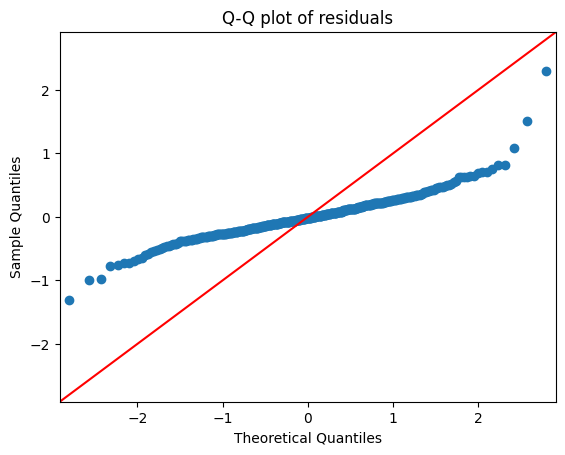

In [24]:
sm.qqplot(residuals, line ='45')
plt.title('Q-Q plot of residuals')
plt.show()

The error term is not normally distributed. However, since we have 390, that are far more than 100, the CLT applies, so in this context the not-normality of error term is not critical.

### 3.e Using Model 2, identify the most under-priced accommodation with at least 4 stars.

In [25]:
DDF = df[(df['stars4']==1)|(df['stars5']==1)].copy()
X = DDF[['Hotel', 'stars3','stars4','stars5','stars3_Hotel','stars4_Hotel','exp_rating','ln_distance','distance']]
X = sm.add_constant(X)

DDF['predicted_price'] = np.exp(ex2_model2.predict(X))
DDF['price_discrepancy'] = DDF['price'] - DDF['predicted_price']

most_underpriced_accommodation = DDF.sort_values(by='price_discrepancy').iloc[0]
most_underpriced_accommodation[['price', 'predicted_price', 'price_discrepancy', 'stars', 'accommodation_type', 'distance', 'rating']]



price                        229
predicted_price       391.212171
price_discrepancy    -162.212171
stars                        5.0
accommodation_type     Apartment
distance                     1.0
rating                       4.8
Name: 5, dtype: object